# Assignment 1


1) Read chapters 2-4 in your textbook and review the coding examples we went over in class

2) Review the Keras documentation for things like the Layer types and Optimizer types to better familiarize yourself

3) Redo the coding examples and do the "Further experiments" in chapter 3 of your book with datasets you find interesting and may want to use for further assignments and projects

4) Provide a brief write up of the experiment and analysis.

# **table of contents**

1. import libraries
2. data prep
    1. reading data
    2. finding summary data
    3. dummyizing data
    4. creating predictor & outcome attribute lists
    5. transforming data into numpy arrays
    6. creating training and testing data
    7. standardizing the data (z-scoring)
3. modeling
    1. initial model
        1. building layers
        2. fitting model on training data
        3. predicting with test data
    2. further experiments
        1. model using one hiddden layer 
        2. model using more hidden units 
        3. model using mae loss
        4. model using tanh activation
    3. kfold optimization
        1. build model function definition
        2. defining k-fold variables
        3. k-fold loop
        4. plotting k-fold results
        5. building model from validation


## 1 import libraries

In [1]:
# data prep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

# keras imports
from keras import models
from keras import layers
from keras import optimizers

# random seed for pseudo-random operations
random_seed = 100

Using TensorFlow backend.


## 2 data prep

#### *2.1 reading dataset*

In [251]:
math_data = pd.read_csv("https://raw.githubusercontent.com/connoralydon/datasets/main/student-math.csv", sep=";")

#### *2.2 summary info about data*

In [252]:
math_data.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [253]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [254]:
math_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [255]:
math_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [256]:
math_data.shape

(395, 33)

In [257]:
# observe the different values used for species - 2 different values: 0, 1
def print_range(data):
    print(f"range of {data.min()} to {data.max()}\n")

print("First test")
print_range(math_data["G2"])

print("Second test")
print_range(math_data["G1"])

print("Final test")
print_range(math_data["G3"])

First test
range of 0 to 19

Second test
range of 3 to 19

Final test
range of 0 to 20



In [258]:
print("total null values")
math_data.isnull().sum(axis=0).sum()

total null values


0

In [259]:
print("num duplicates")
math_data.duplicated().sum(axis=0)

num duplicates


0

#### *2.3 dummyizing data*

In [260]:
categorical_cols = {}

for col in math_data.columns:
    if(math_data[col].dtype == "object"):
        categorical_cols[col] = list(math_data[col].unique())

numerical_cols = list(set(math_data.columns) - set(categorical_cols.keys())) # set difference

math_data_dummy = pd.get_dummies(math_data, columns = categorical_cols.keys())

#### *2.4 model variables*
removing g1, g2, g3 because they would be highly autocorrelary. someone who does good on one test is likely t odo good on another.

In [261]:
predictors = list(math_data_dummy.columns)
predictors.remove("G1") # first exam
predictors.remove("G2") # second exam
predictors.remove("G3") # third exam

outcome = "G3"

#### *2.5 transforming data into numpy arrays*
this is because keras won't take pandas dataframes

In [262]:
X = np.array(math_data_dummy[predictors])
y = np.array(math_data_dummy[outcome])


#### *2.6 creating training and testing data*

In [263]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=random_seed)

#### *2.7 standardizing the data (z-scoring)*
to avoid wildy wifferent values in the model

In [264]:
z = StandardScaler() # standard scaling object
# z = MinMaxScaler() # alternative min max scaler so all values should lie between 0-1 for training and about that for testing

# fitting scaler object to training data then outputting it
X_train = z.fit_transform(X_train)
# fit the testing data on the distributions found in the training data
X_test = z.transform(X_test)


## 3 modeling

#### *3.1 building initial model*

In [265]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1)) # adding this layer because it is a regression problem


##### *3.1.1 compiling model loss*

In [266]:

model.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])


##### *3.1.2 fitting model on training data*

In [267]:
model_output = model.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 119.6751 - mae: 9.9906
Epoch 2/20
316/316 [==============================] - 0s 72us/step - loss: 101.0312 - mae: 9.1572
Epoch 3/20
316/316 [==============================] - 0s 64us/step - loss: 86.5112 - mae: 8.4750
Epoch 4/20
316/316 [==============================] - 0s 68us/step - loss: 72.8146 - mae: 7.6959
Epoch 5/20
316/316 [==============================] - 0s 69us/step - loss: 58.0657 - mae: 6.8205
Epoch 6/20
316/316 [==============================] - 0s 64us/step - loss: 47.2777 - mae: 6.0455
Epoch 7/20
316/316 [==============================] - 0s 64us/step - loss: 35.8962 - mae: 5.1757
Epoch 8/20
316/316 [==============================] - 0s 65us/step - loss: 28.4997 - mae: 4.3849
Epoch 9/20
316/316 [==============================] - 0s 60us/step - loss: 25.6380 - mae: 4.1440
Epoch 10/20
316/316 [==============================] - 0s 63us/step - loss: 25.0365 - mae: 3.9596
Epoch 11/20
316/316 [=======

##### *3.1.3 predicting with test data*

In [268]:
predicted = model.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted[0]}")
print(f"test: mean absolute error loss {predicted[1]}")

79/79 [==============================] - 0s 934us/step
test: mean squared error loss 15.240999076939836
test: mean absolute error loss 3.09421443939209


#### *3.2 further experiments*
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
3. Try using the mae loss function instead of mse.
4. Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.

##### *3.2.1 model using one hiddden layer*

In [269]:
model_slim = models.Sequential()
model_slim.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_slim.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_slim.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_slim.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])

model_slim_output = model_slim.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 876us/step - loss: 114.9323 - mae: 9.7166
Epoch 2/20
316/316 [==============================] - 0s 60us/step - loss: 106.8649 - mae: 9.4300
Epoch 3/20
316/316 [==============================] - 0s 59us/step - loss: 96.7718 - mae: 8.9687
Epoch 4/20
316/316 [==============================] - 0s 55us/step - loss: 87.5347 - mae: 8.4870
Epoch 5/20
316/316 [==============================] - 0s 86us/step - loss: 81.4040 - mae: 8.1444
Epoch 6/20
316/316 [==============================] - 0s 77us/step - loss: 74.4145 - mae: 7.7717
Epoch 7/20
316/316 [==============================] - 0s 59us/step - loss: 67.0496 - mae: 7.3437
Epoch 8/20
316/316 [==============================] - 0s 60us/step - loss: 60.9565 - mae: 6.9774
Epoch 9/20
316/316 [==============================] - 0s 54us/step - loss: 54.7326 - mae: 6.5678
Epoch 10/20
316/316 [==============================] - 0s 58us/step - loss: 47.6141 - mae: 6.0871
Epoch 11/20
316/316 [=====

In [270]:
predicted_slim = model_slim.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_slim[0]}")
print(f"test: mean absolute error loss {predicted_slim[1]}")

79/79 [==============================] - 0s 851us/step
test: mean squared error loss 22.277899392043487
test: mean absolute error loss 3.940617799758911


underfitting here, and not capturing the real values in the data.

##### *3.2.2 model using more hidden units*

In [271]:
model_fat = models.Sequential()
model_fat.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_fat.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_fat.add(layers.Dense(128, activation='relu'))
model_fat.add(layers.Dropout(0.3, seed=random_seed))
model_fat.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_fat.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])

model_fat_output = model_fat.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 57.5891 - mae: 6.4724
Epoch 2/20
316/316 [==============================] - 0s 244us/step - loss: 22.2892 - mae: 3.7171
Epoch 3/20
316/316 [==============================] - 0s 251us/step - loss: 17.6542 - mae: 3.2800
Epoch 4/20
316/316 [==============================] - 0s 260us/step - loss: 17.3445 - mae: 3.3105
Epoch 5/20
316/316 [==============================] - 0s 264us/step - loss: 16.1278 - mae: 3.1216
Epoch 6/20
316/316 [==============================] - 0s 261us/step - loss: 15.1920 - mae: 3.0420
Epoch 7/20
316/316 [==============================] - 0s 245us/step - loss: 14.4454 - mae: 3.0478
Epoch 8/20
316/316 [==============================] - 0s 234us/step - loss: 12.9277 - mae: 2.7721
Epoch 9/20
316/316 [==============================] - 0s 246us/step - loss: 12.9546 - mae: 2.7830
Epoch 10/20
316/316 [==============================] - 0s 241us/step - loss: 11.2297 - mae: 2.6013
Epoch 11/20
316/316 [

In [272]:
predicted_fat = model_fat.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_fat[0]}")
print(f"test: mean absolute error loss {predicted_fat[1]}")

79/79 [==============================] - 0s 1ms/step
test: mean squared error loss 15.176022903828681
test: mean absolute error loss 2.9776809215545654


model performs good here, better than the original geometry

##### *3.2.3 model using mae loss*

In [273]:
model_mae = models.Sequential()
model_mae.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_mae.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_mae.add(layers.Dense(16, activation='relu'))
model_mae.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_mae.compile(optimizer='rmsprop', 
              loss='mae', 
              metrics=['mse'])

model_mae_output = model_mae.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 10.0771 - mse: 122.1471
Epoch 2/20
316/316 [==============================] - 0s 72us/step - loss: 9.1377 - mse: 101.8730
Epoch 3/20
316/316 [==============================] - 0s 64us/step - loss: 8.2996 - mse: 85.0169
Epoch 4/20
316/316 [==============================] - 0s 72us/step - loss: 7.4872 - mse: 69.8086
Epoch 5/20
316/316 [==============================] - 0s 66us/step - loss: 6.3562 - mse: 53.3596
Epoch 6/20
316/316 [==============================] - 0s 67us/step - loss: 5.5196 - mse: 41.4658
Epoch 7/20
316/316 [==============================] - 0s 67us/step - loss: 5.0455 - mse: 34.3769
Epoch 8/20
316/316 [==============================] - 0s 61us/step - loss: 4.5097 - mse: 29.7655
Epoch 9/20
316/316 [==============================] - 0s 64us/step - loss: 4.2765 - mse: 27.2567
Epoch 10/20
316/316 [==============================] - 0s 61us/step - loss: 3.9621 - mse: 24.7270
Epoch 11/20
316/316 [======

In [274]:
predicted_mae_model = model_mae.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_mae_model[1]}")
print(f"test: mean absolute error loss {predicted_mae_model[0]}")

79/79 [==============================] - 0s 933us/step
test: mean squared error loss 16.141311645507812
test: mean absolute error loss 3.067770185349863


the model performs about the same in this case with a little bit better scores overall

##### *3.2.4 model using tanh activation*

In [275]:
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)))
model_tanh.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_tanh.add(layers.Dense(16, activation='tanh'))
model_tanh.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_tanh.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])

model_tanh_output = model_tanh.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 126.9281 - mae: 10.2410
Epoch 2/20
316/316 [==============================] - 0s 70us/step - loss: 122.7916 - mae: 10.0862
Epoch 3/20
316/316 [==============================] - 0s 66us/step - loss: 120.1034 - mae: 9.9677
Epoch 4/20
316/316 [==============================] - 0s 64us/step - loss: 115.7618 - mae: 9.7880
Epoch 5/20
316/316 [==============================] - 0s 70us/step - loss: 112.6738 - mae: 9.6679
Epoch 6/20
316/316 [==============================] - 0s 64us/step - loss: 107.7759 - mae: 9.4378
Epoch 7/20
316/316 [==============================] - 0s 65us/step - loss: 103.9476 - mae: 9.2530
Epoch 8/20
316/316 [==============================] - 0s 64us/step - loss: 97.5534 - mae: 8.9889
Epoch 9/20
316/316 [==============================] - 0s 65us/step - loss: 93.6230 - mae: 8.7832
Epoch 10/20
316/316 [==============================] - 0s 63us/step - loss: 88.3186 - mae: 8.4938
Epoch 11/20
316/316 [

In [276]:
predicted_tanh = model_tanh.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_tanh[0]}")
print(f"test: mean absolute error loss {predicted_tanh[1]}")

79/79 [==============================] - 0s 923us/step
test: mean squared error loss 44.83786131460455
test: mean absolute error loss 5.621185779571533


lots more loss in a model that uses a tanh actuvation vs relu activation for this neural network geometry

#### *3.3 k fold validation*

the code here is taken out of the textbook for the regression examples

##### *3.3.1 build model function definition*

In [277]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

##### *3.3.2 defining k-fold variables*

In [278]:
n_folds = 10
num_epochs = 20
num_val_samples = len(X_train) // n_folds
all_mae_histories = []

##### *3.3.3 k-fold loop*

In [279]:

for i in range(n_folds):
    print("processing fold #", i)
    val_data = X_train[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis = 0)
    
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


##### *3.3.4 plotting k-fold results*

In [280]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

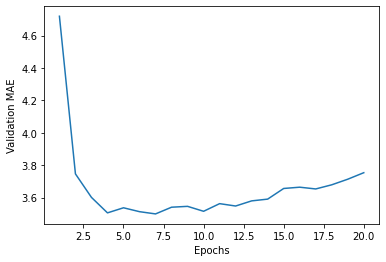

In [281]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

looks like validation mean absolute error is minimized at around 10 epochs or so

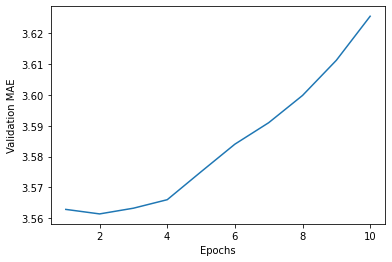

In [282]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

this shows the average validation score vs number of epochs. it goes up over the epochs, but is not that different in absolute terms.

##### *3.3.5 building model from validation*

In [283]:
model = build_model()
model.fit(X_train, y_train,
          epochs = 10, batch_size = 20)

test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"testing mean absolute error {test_mae_score}")

Epoch 1/10
316/316 [==============================] - 0s 852us/step - loss: 123.0432 - mae: 10.0735
Epoch 2/10
316/316 [==============================] - 0s 62us/step - loss: 109.4362 - mae: 9.5152
Epoch 3/10
316/316 [==============================] - 0s 53us/step - loss: 96.4149 - mae: 8.9209
Epoch 4/10
316/316 [==============================] - 0s 58us/step - loss: 82.2523 - mae: 8.2291
Epoch 5/10
316/316 [==============================] - 0s 59us/step - loss: 67.8744 - mae: 7.4199
Epoch 6/10
316/316 [==============================] - 0s 57us/step - loss: 53.8478 - mae: 6.5491
Epoch 7/10
316/316 [==============================] - 0s 54us/step - loss: 41.5124 - mae: 5.6553
Epoch 8/10
316/316 [==============================] - 0s 55us/step - loss: 31.3870 - mae: 4.8664
Epoch 9/10
316/316 [==============================] - 0s 54us/step - loss: 24.1829 - mae: 4.1737
Epoch 10/10
79/79 [==============================] - 0s 666us/step
testing mean absolute error 3.905726909637451


the mean absolute error for the testing error is 3.3 grade units out of 20. this model does pretty well and is not far off from the training data. 3.26 mae in training and 3.3 in testing. epochs of 10 are a good way to normalize it for this network geometry.